## 1. 소규모 데이터셋으로 만드는 강력한 학습 모델

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [10]:
# 기존 이미지  갯수 늘리기:전처리
train_data_gen = ImageDataGenerator(rescale=1./255,            # 정규화
                                   horizontal_flip=True,       # 수평 뒤집기
                                   width_shift_range=0.1,       # 수평 이동
                                   height_shift_range=0.1,      # 수직이동
                                   fill_mode='nearest')
train_generator = train_data_gen.flow_from_directory('./data/train', target_size=(150, 150), batch_size=5, class_mode='binary')

test_data_gen = ImageDataGenerator(rescale=1./255)  # 테스트 데이터는 정규화만
test_generator = test_data_gen.flow_from_directory('./data/test', target_size=(150, 150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 activation_1 (Activation)   (None, 36, 36, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)       

In [11]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

erary_stop = EarlyStopping(patience=5)

history = model.fit(train_generator, epochs=200, validation_data=test_generator, validation_steps=10, callbacks=[erary_stop])

Epoch 1/200
32/32 [==============================] - 7s 176ms/step - loss: 0.7029 - accuracy: 0.4437 - val_loss: 0.6798 - val_accuracy: 0.5400
Epoch 2/200
32/32 [==============================] - 4s 129ms/step - loss: 0.6986 - accuracy: 0.5063 - val_loss: 0.6862 - val_accuracy: 0.7600
Epoch 3/200
32/32 [==============================] - 4s 126ms/step - loss: 0.6898 - accuracy: 0.5250 - val_loss: 0.6882 - val_accuracy: 0.5800
Epoch 4/200
32/32 [==============================] - 4s 122ms/step - loss: 0.6894 - accuracy: 0.5188 - val_loss: 0.6817 - val_accuracy: 0.5400
Epoch 5/200
32/32 [==============================] - 4s 119ms/step - loss: 0.6837 - accuracy: 0.5875 - val_loss: 0.6544 - val_accuracy: 0.5800
Epoch 6/200
32/32 [==============================] - 4s 123ms/step - loss: 0.6840 - accuracy: 0.5875 - val_loss: 0.6729 - val_accuracy: 0.5600
Epoch 7/200
32/32 [==============================] - 4s 125ms/step - loss: 0.6553 - accuracy: 0.6438 - val_loss: 0.6631 - val_accuracy: 0.5200

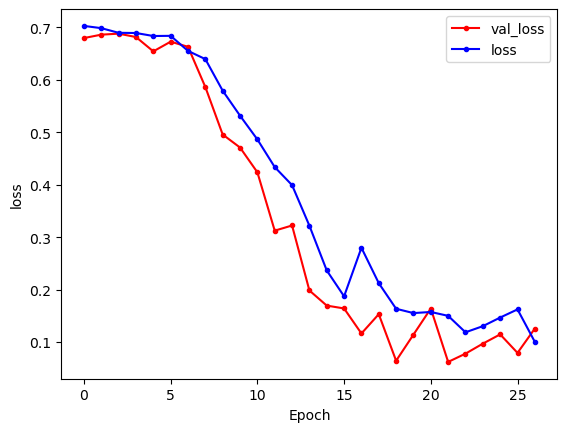

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='val_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()